# Projekt
Trying to recreate the Projekt in a notebook first. I will add a Web-GUI later on. 

In [19]:
import os 
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Install skforecast if not already installed
#%pip install skforecast
import skforecast

In [20]:
import os
import datetime
import pandas as pd
from glob import glob

import dask.dataframe as dd

def import_files(years=1): 
    cwd_data = r"./CSVs/tankerkoenig-data/prices/"
    current_year = datetime.datetime.now().year
    cwd_data_year = os.path.join(cwd_data, str(current_year))
    past_year_files = glob(os.path.join(cwd_data_year, '**', '*.csv'), recursive=True)
    return past_year_files

def makeData(files):
    df = dd.read_csv(files, sep=",").compute()
    print(df.shape)
    return df

files = import_files()
data = makeData(files)


(21038346, 8)


In [ ]:
# Copying the code so it does not have to be imported again
data_copy = data.copy()

In [22]:
data = data_copy.copy()

In [23]:
data.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2025-02-15 00:00:16+01,9018fe8d-583f-494e-b865-d71128c4d973,1.679,1.819,0.000,1,0,0
1,2025-02-15 00:00:16+01,00060117-0001-4444-8888-acdcffffffff,1.739,1.859,1.799,1,1,1
2,2025-02-15 00:00:16+01,ecc1f7d9-6882-435d-83a4-8414bb0d867a,1.659,1.769,1.709,1,0,0
3,2025-02-15 00:00:16+01,6d02123d-6f89-47c2-9941-f4306b0f5aca,1.649,1.789,1.729,1,1,1
4,2025-02-15 00:01:17+01,9eb40500-5193-45e3-8699-86283f864c4a,1.669,1.819,1.759,1,0,0


# Filter for one local station

In [24]:
stations = pd.read_csv("./CSVs/tankerkoenig-data/stations/2024/11/2024-11-01-stations.csv")
local_station = stations[stations["post_code"] == "42699"]
for index, row in local_station.iterrows():
    print(row["name"], row["brand"], row["street"], row["house_number"], row["post_code"], row["uuid"])

Esso Tankstelle ESSO MERSCHEIDER STR. 75   42699 c5c4c0ba-e1af-4efe-8390-1288791780a8
Esso Tankstelle ESSO LOEHDORFER STR. 197   42699 b8ccdaea-9abc-486a-bea3-1a63da613481
Otto Kirschbaum GmbH & Co. KG Kirschbaum An den Eichen 5 42699 986faf05-5fbf-45f3-b07d-a2f542d37c17
bft BFT Merscheider Straße  152 42699 287f8a6d-e571-4b04-bc7e-e5183c29ae98
Wittgens & Karabegovic Gbr. Westfalen Kamper Str. 11 42699 3697aef2-3aa0-48d0-8174-0fc956e31893
star Tankstelle STAR Aufderhöher Straße 168 42699 005056ba-7cb6-1ed2-bceb-809ceefacd2a
tank point Solingen nan Merscheider Straße 30 42699 7b092eb3-7063-4477-a402-9e82730f3c23
tankpoint Tankstelle tankpoint Merscheider Str. 30 42699 5c36bc65-ad18-4457-bdfe-4bbeff8f2916


In [25]:
# Filter for one Station
df = data[data['station_uuid'] == '005056ba-7cb6-1ed2-bceb-809ceefacd2a']
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce', utc=True)
df.set_index('date', inplace=True)

/var/folders/3y/snyjd7qd59d_gxq1x0y5gywh0000gn/T/ipykernel_15257/3109830979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce', utc=True)


In [26]:
df.head()

,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
date,,,,,,,
2025-02-15 04:53:32+00:00,005056ba-7cb6-1ed2-bceb-809ceefacd2a,1.629,1.769,1.709,1,1,1
2025-02-15 05:51:22+00:00,005056ba-7cb6-1ed2-bceb-809ceefacd2a,1.769,1.869,1.809,1,1,1
2025-02-15 07:05:29+00:00,005056ba-7cb6-1ed2-bceb-809ceefacd2a,1.759,1.859,1.799,1,1,1
2025-02-15 07:23:48+00:00,005056ba-7cb6-1ed2-bceb-809ceefacd2a,1.749,1.859,1.799,1,0,0
2025-02-15 07:32:57+00:00,005056ba-7cb6-1ed2-bceb-809ceefacd2a,1.749,1.849,1.789,0,1,1


In [ ]:
# Drop unnecessary items from table 
df.drop(['station_uuid', 'e5', 'diesel','dieselchange', 'e5change', 'e10change'], axis=1, inplace=True)

/var/folders/3y/snyjd7qd59d_gxq1x0y5gywh0000gn/T/ipykernel_15257/1407906818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['station_uuid', 'e5', 'diesel','dieselchange', 'e5change', 'e10change'], axis=1, inplace=True)


In [ ]:
# Resample to 15 Minutes as fuel prices are not updated that often, makes training easier 
df = df.resample('15min').mean().interpolate()

In [ ]:
# Get date Range to exempt test day 
print(df.index.min(), df.index.max())
max = df.index.max()
max_day_ago = max - pd.DateOffset(days=1)
print(max_day_ago)
train = df[df.index < max_day_ago]
test = df[df.index >= max_day_ago]


2024-12-31 23:30:00+00:00 2025-02-17 22:15:00+00:00
2025-02-16 22:15:00+00:00


In [30]:
df.dropna(inplace=True)

In [31]:
from skforecast.recursive import ForecasterRecursive
steps = 120
lags = 120
forecaster = ForecasterRecursive(
    regressor = RandomForestRegressor(random_state=123, 
                                      n_jobs=-1), 
    lags = lags,
)


In [ ]:
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import TimeSeriesFold
# Finding best Hyperparameters for Model
lags_grid = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
param_grid = {
    'n_estimators': [50, 100, 200, 400, 500, 600],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
cv = TimeSeriesFold(
    steps = 120,
    initial_train_size = int(len(train)*0.7),
    refit = False,
)
results = grid_search_forecaster(
    forecaster = forecaster,
    y = train['e10'],
    cv = cv,
    param_grid = param_grid,
    lags_grid = lags_grid,
    metric = 'mean_squared_error',
    return_best = True,
    verbose = True,
    )

Number of models compared: 80.


lags grid:   0%|          | 0/20 [00:00<?, ?it/s]

params grid:   0%|          | 0/4 [00:00<?, ?it/s]

Information of folds
--------------------
Number of observations used for initial training: 3154
Number of observations used for backtesting: 1353
    Number of folds: 12
    Number skipped folds: 0 
    Number of steps per fold: 120
    Number of steps to exclude between last observed data (last window) and predictions (gap): 0
    Last fold only includes 33 observations.

Fold: 0
    Training:   2024-12-31 23:30:00+00:00 -- 2025-02-02 19:45:00+00:00  (n=3154)
    Validation: 2025-02-02 20:00:00+00:00 -- 2025-02-04 01:45:00+00:00  (n=120)
Fold: 1
    Training:   No training in this fold
    Validation: 2025-02-04 02:00:00+00:00 -- 2025-02-05 07:45:00+00:00  (n=120)
Fold: 2
    Training:   No training in this fold
    Validation: 2025-02-05 08:00:00+00:00 -- 2025-02-06 13:45:00+00:00  (n=120)
Fold: 3
    Training:   No training in this fold
    Validation: 2025-02-06 14:00:00+00:00 -- 2025-02-07 19:45:00+00:00  (n=120)
Fold: 4
    Training:   No training in this fold
    Validation: 20

In [33]:
print(results)

                                                 lags  \
0   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
1   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
2   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
3   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
4   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
..                                                ...   
75                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
76  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
77                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
78                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
79                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   

                                           lags_label                 params  \
0   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'n_estimators': 400}   
1   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'n_estimators': 200}   
2   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  {'n_estimators': 400

In [34]:
forecaster.fit(y=train['e10'])
pred = forecaster.predict(steps=120)

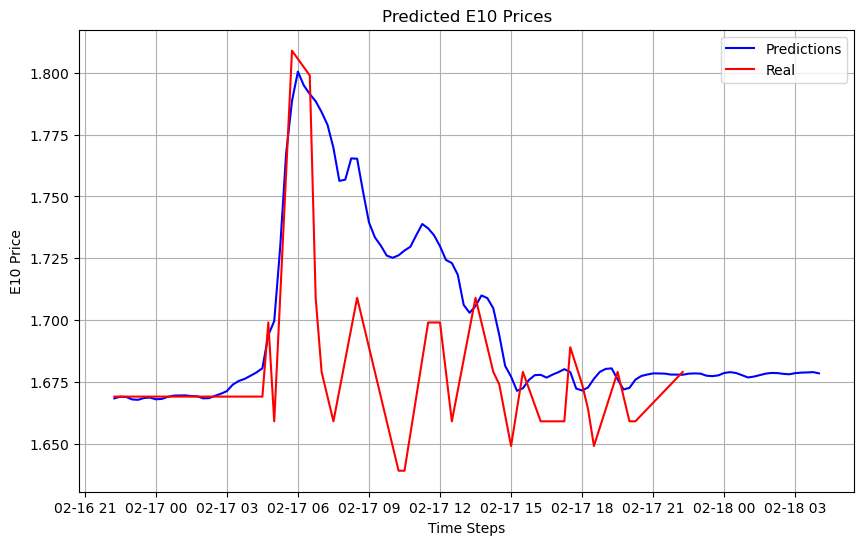

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(pred, linestyle='-', color='b', label='Predictions')
plt.plot(test['e10'], linestyle='-', color='r', label='Real')
plt.title('Predicted E10 Prices')
plt.xlabel('Time Steps')
plt.ylabel('E10 Price')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
predictions = forecaster.predict(steps=len(test))
mse = mean_absolute_error(test['e10'], predictions)
print(f'Mean Absolute Error: {mse}')

Mean Squared Error: 0.02419583786629129
